# Lending Club Analysis

# Overview

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Point to consider

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Sourcing Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='whitegrid')

In [24]:
loan=pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [25]:
loan.shape

(39717, 111)

In [26]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

# Cleaning the Data

In [27]:
missing_val = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_val.loc[missing_val > 0] # missing columns value in percentage

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

The values showing the number 100 shows that the columns has all the values missing and has no use in our further analysis

In [28]:
columns_with_missing_values = list(missing_val[missing_val >= 50].index)
loan = loan.drop(columns_with_missing_values,axis=1) # dropping missing value 

In [29]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [30]:
loan = loan.drop('desc',axis=1) # dropping Desc as that too doesnt contribute in data

Examiming the unique values in al the columns in the above cleaned rows

In [32]:
print("Unique values in columns")
print("emp_title : %d"  % len(loan.emp_title.unique()))
print("emp_length : %d"  % len(loan.emp_length.unique()))
print("title : %d"  % len(loan.title.unique()))
print("revol_util : %d"  % len(loan.revol_util.unique()))
print("title : %d"  % len(loan.title.unique()))
print("last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("tax_liens : %d"  % len(loan.tax_liens.unique()))

Unique values in columns
emp_title : 28821
emp_length : 12
title : 19616
revol_util : 1090
title : 19616
last_pymnt_d : 102
last_credit_pull_d : 107
collections_12_mths_ex_med : 2
chargeoff_within_12_mths : 2
pub_rec_bankruptcies : 4
tax_liens : 2


# In the abouve value we observe that the below columns can be identified as categorial bases on the ranges of their respective values:
    
    emp_length
    collections_12_mths_ex_med
    chargeoff_within_12_mths
    pub_rec_bankruptcies 
    tax_liens

In [35]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  39717.000000    39717.000000  39717.000000  39717.000000   
mean       0.146512        0.869200      9.294408      0.055065   
std        0.491812        1.070219      4.400282      0.237200   
min        0.000000        0.000000      2.000000      0.000000   
25%        0.000000        0.000000      6.000000      0.000000   
50%        0.000000        1.000000      9.000000      0.000000   
75%        0.000000        1.000000     12.000000      0.000000   
max       11.000000        8.000000     44.000000      4.000000   

           revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000   
mean    13382.528086     22.088828     51.227887      50.989768  12153.596544   
std     15885.016641     11.401709    375.172839     373.824457   9042.040766   
min         0.000000      2.000000      0.000000       0.000000      0.000000   
25%      3703.000000     13.000000      0.000000       0.000000   5576.930000   
50%      8850.000000     20.000000      0.000000       0.000000   9899.640319   
75%     17058.000000     29.000000      0.000000       0.000000  16534.433040   
max    149588.000000     90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min        0.000000                 0.000000         0.000000   
25%        0.000000                 0.000000       218.680000   
50%        0.000000                 0.000000       546.140000   
75%        0.000000                 0.000000      3293.160000   
max    29623.350000              7002.190000     36115.200000   

       collections_12_mths_ex_med  policy_code  acc_now_delinq  \
count                     39661.0      39717.0         39717.0   
mean                          0.0          1.0             0.0 

In [37]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [38]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [40]:
loan.tax_liens.unique()

array([ 0., nan])

From the unique values we see column "collections_12_mths_ex_med" , "chargeoff_within_12_mths" , "tax_liens" have 2 unique values and would not impact the analysys veru much as most of them are 0 ,nan and can be dropped

In [41]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [42]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [46]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [45]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

We see that the pub_rec_bankruptcies has values 0 , 1 , 2 with value 0 with higest count..as this is critical column we would 

While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [47]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

columns emp_title, emp_length have 6.19% and 2.71% missing value and are critical for analysis hence we will impute missing values

In [49]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [50]:
#Other value have very minimal value of missing rows and the rows with null values can be removed 
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [51]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

Series([], dtype: float64)

# NO missing values...yay:)

In [52]:
loan.nunique().sort_values() # columns in the resulted dataframe and find only the ones with are contributing in the analysis.

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [54]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan= loan.drop(columns_tobe_dropped,axis=1)

# Formatting data

Rounding off the numeric columns for smooth analysis

In [56]:
loan.total_pymnt= round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)

below columns includes date and needs to converted to particular frormat (date time)

issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d

In [57]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

Removing duplicate values in rows

In [59]:
loan=loan.drop_duplicates()

In [61]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float') # removing % from int_rate , revol_util to proper format

In [63]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

we have value '<' which can damage the data , this as per the data dict is value between 0 and 1-year , hance replacing the values < with 0

In [66]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_length_dict })

In [68]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [70]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

Column Term has the value : X months , which are either 36 and 60, we can split this as only x and remove 'months' 

In [73]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [77]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100
# split the date column into earliest_cr_line_month and earliest_cr_line_year

In [78]:
loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [80]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

Since the data is cleaned moving this to master DF for further analysis

# Analysing the cleaned data

In [84]:
loan.to_csv('master.csv', encoding='utf-8', index=False)
master=loan[:]
master.shape

(36433, 42)

In [86]:
master.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [89]:
loan = master[master['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape # we can ignore the current loan as this will not contribute in analysis 

(35367, 42)

Plotting

In [106]:
# This function plots a given column against loan_status

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [91]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [125]:
# This method prints two plots side by side
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master.loc[master['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)

In [93]:
(master['grade'].value_counts(normalize=True)*100).sort_index()

A    25.183213
B    30.288475
C    20.396344
D    13.380726
E     7.273626
F     2.659677
G     0.817940
Name: grade, dtype: float64

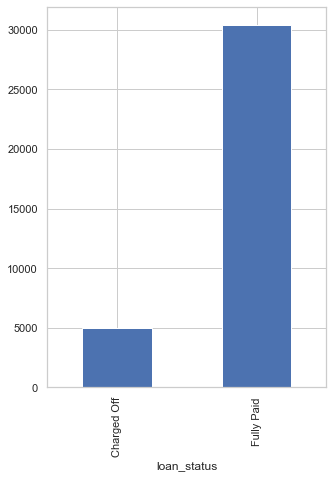

In [96]:
plt.figure(figsize=(5,7))
ax = loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

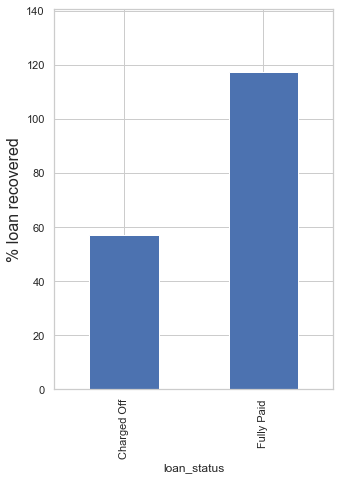

In [100]:
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes (117-17)17-18%% approx profit. 

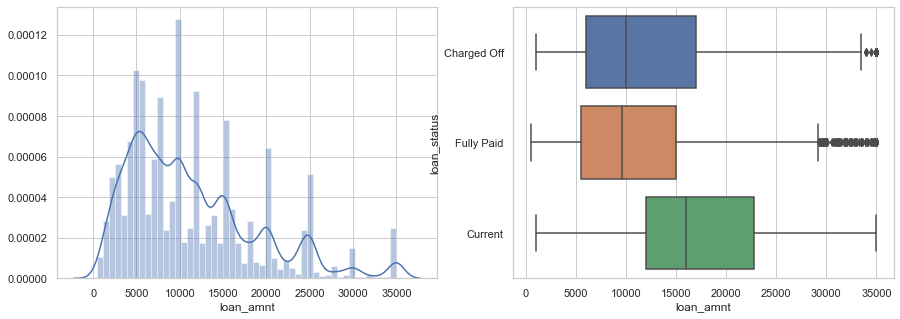

In [102]:
plot_distribution(master, 'loan_amnt')

Reading :
    
    Most of the loans granted are below 15000
    Funding amounts see a spike around each 5000 boundary

In [103]:
## derived variable 
master['loan_amnt_bin'] = pd.cut(master['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


In [108]:
plotLoanStatus(master, 'loan_amnt_bin')

Reading:
    The higher loans, though lesser in number, carry a substantially higher risk of default. 

Plotting categorial variable

In [109]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))

    plt.tight_layout()

In [111]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

From above we get :
    Most loans are for 36 month term 
    Very few loans are extended to people with prior record of bankruptcy
    debt_consolidation is by far the largest 'purpose' for seeking a loan 
    Most approved loans are high grade
    We should investigate the frequencies of defaults by term, purpose and prior record of bankruptcy 

In [126]:
plt.figure(figsize=(10,5))
plot_percentages(master, 'term')

Reading:
     The higher term loans have a higher chance of default.

In [128]:
plt.figure(figsize=(15,5))
plot_percentages(loan, 'purpose')

Reading:  The category 'small_business' percentage doubles from 3.8 to 7.2 for Charged Off loans.

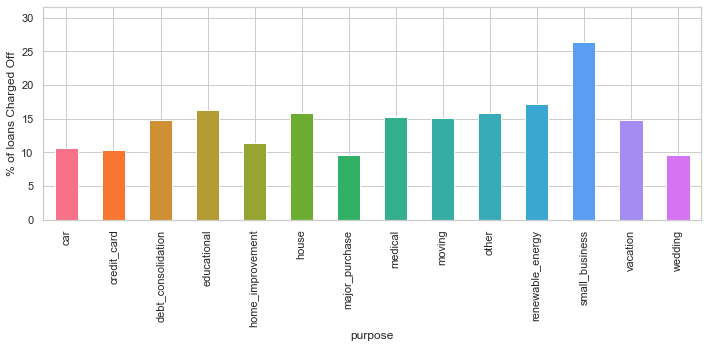

In [130]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'purpose')

Reading:
    26% of loans for small business are Charged Off. Making them the most risky purpose
    Approximately ~49% of the loans are issued for the purpose of dept consolidation.
    17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance. 

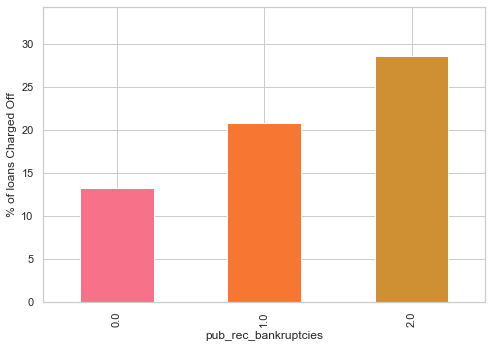

In [132]:
plt.figure(figsize=(7,5))
plotLoanStatus(master, 'pub_rec_bankruptcies')

Reading:  The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy

<Figure size 1080x360 with 0 Axes>

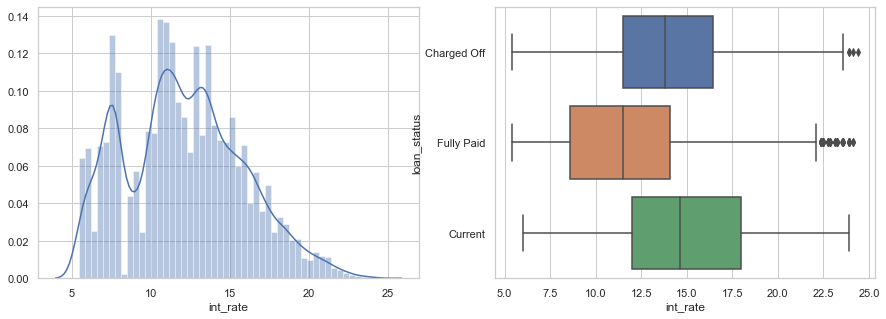

In [134]:
plt.figure(figsize=(15,5))
plot_distribution(master, 'int_rate')

Reading:  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases

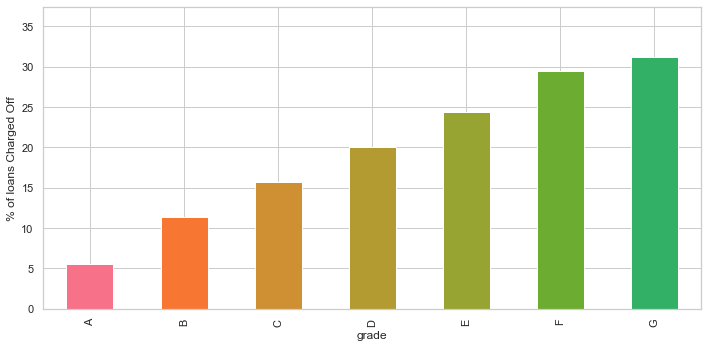

In [145]:
plt.figure(figsize=(10,5))
plotLoanStatus(master, 'grade')

Reading : The higher the grade, higher is the risk rate...a is less risky than G

# Bivariate Analysis

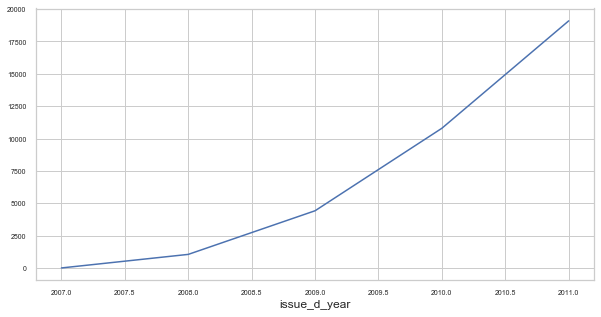

In [147]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

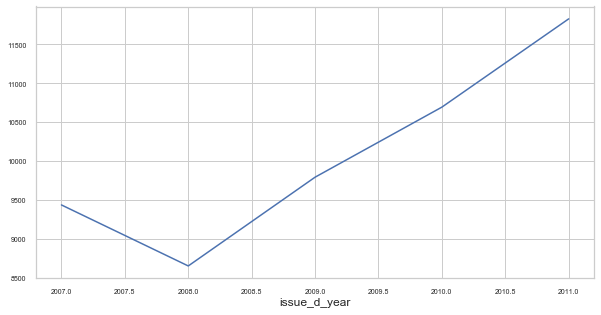

In [149]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

Reading: Average loan amount dropped sharply when subprime mortgage crisis hit

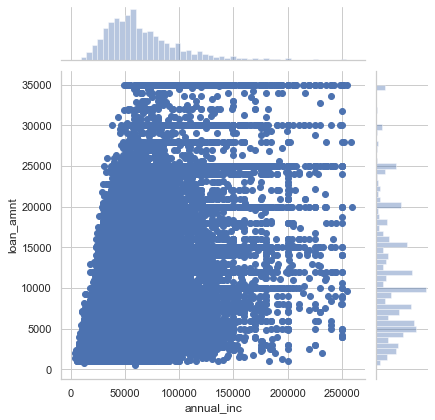

In [153]:
sns.jointplot('annual_inc', 'loan_amnt', master.loc[master['annual_inc']<260000])
plt.show()

Reading:
    There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loan

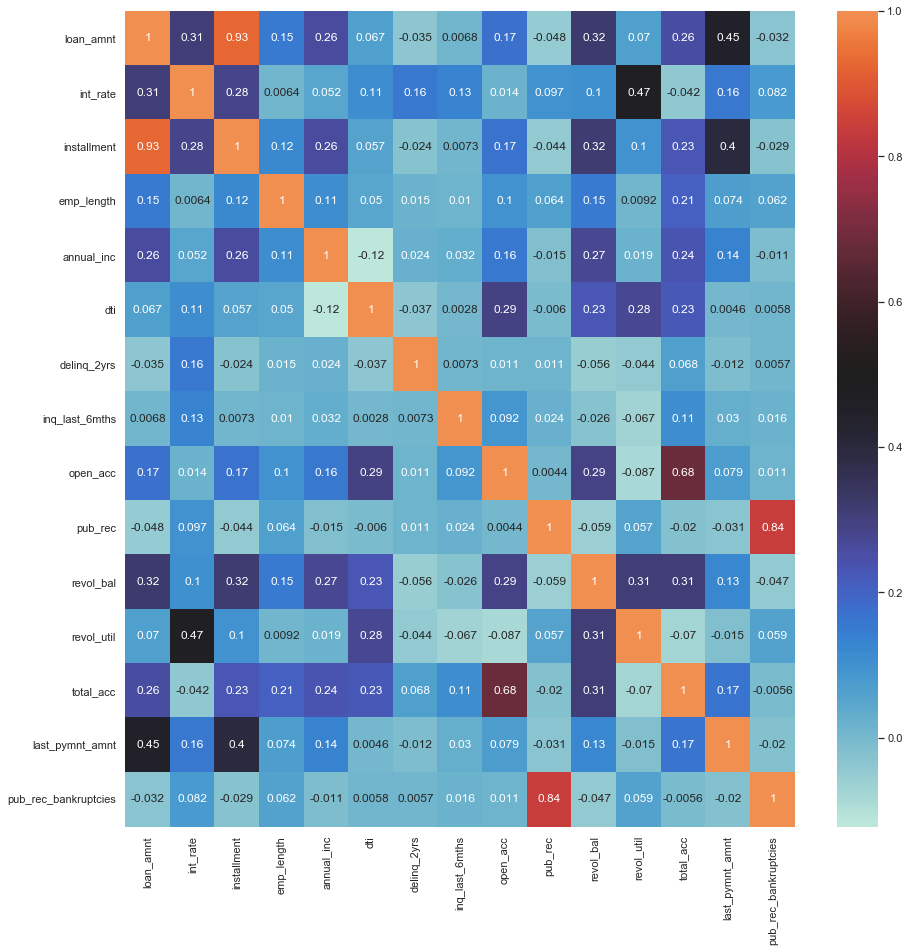

In [155]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)


Observation:
loan_amnt is correlated to last_payment_amount with r factor.44, as expected
int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 